In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [3]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.



In [5]:
x_train = x_train[..., tf.newaxis] #adds a additional axis (60000,28,28) --> (60000,28,28,1)
x_test = x_test[..., tf.newaxis]
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


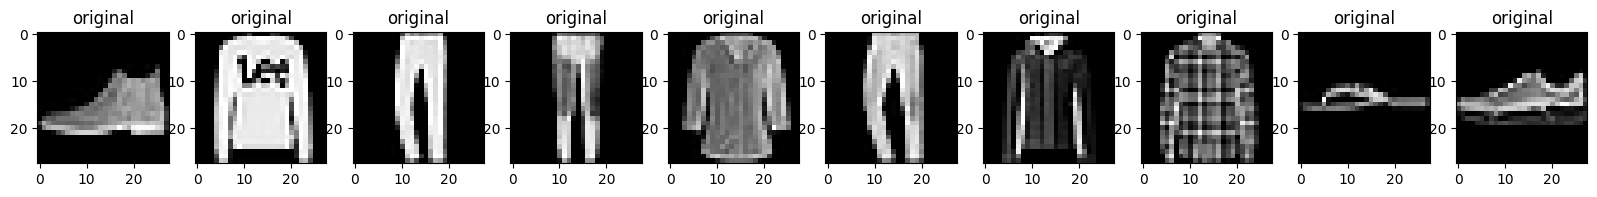

In [6]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.title("original")
    plt.imshow(tf.squeeze(x_test[i]))
    plt.gray()
plt.show()

In [7]:
class Vanilla_CNN(Model):
    def __init__(self):
        super(Vanilla_CNN, self).__init__()
        self.encoder = tf.keras.Sequential([
          layers.Input(shape=(28, 28, 1)),
          layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2),
          layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=2)])

        self.decoder = tf.keras.Sequential([
          layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
          layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
          layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded


In [8]:
autoencoder = Vanilla_CNN()

In [9]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [15]:
autoencoder.fit(x_train, x_train,
                epochs=30,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 31ms/step - loss: 0.0020 - val_loss: 0.0020
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 29ms/step - loss: 0.0020 - val_loss: 0.0020
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 30ms/step - loss: 0.0020 - val_loss: 0.0021
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 29ms/step - loss: 0.0020 - val_loss: 0.0020
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 30ms/step - loss: 0.0020 - val_loss: 0.0020
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 86s 32ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 76s 29ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 89s 33ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 9/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 75s 29ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 10/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 30ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 11/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 29ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 12

In [16]:
autoencoder.encoder.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 14, 14, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 7, 7, 8)             │           1,160 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,320 (5.16 KB)

 Trainable params: 1,320 (5.16 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
autoencoder.decoder.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_transpose (Conv2DTranspose)   │ (32, 14, 14, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_1 (Conv2DTranspose) │ (32, 28, 28, 16)            │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (32, 28, 28, 1)             │             145 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,897 (7.41 KB)

 Trainable params: 1,897 (7.41 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

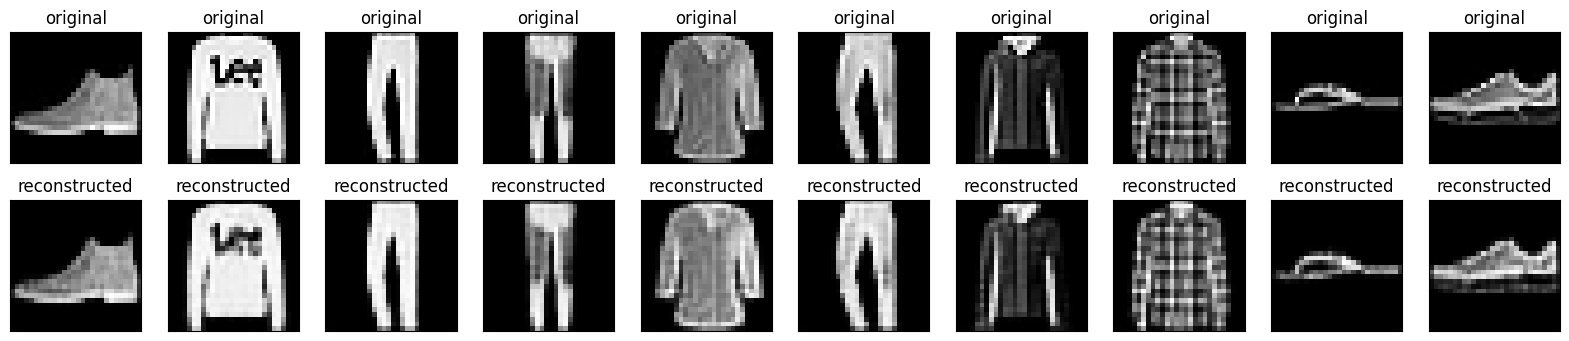

In [19]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.title("original")
    plt.imshow(tf.squeeze(x_test[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(2, n, i + n + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(decoded_imgs[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()

In [21]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.metrics import mean_squared_error

# Define the Autoencoder class
class Autoencoder(tf.keras.models.Model):
    def __init__(self, latent_dim, shape):
        super(Autoencoder, self).__init__()
        self.encoder = tf.keras.Sequential([
            layers.Flatten(),
            layers.Dense(latent_dim, activation='relu'),
        ])
        self.decoder = tf.keras.Sequential([
            layers.Dense(np.prod(shape), activation='sigmoid'),
            layers.Reshape(shape),
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Load the Fashion MNIST dataset
(x_train, _), (x_test, _) = tf.keras.datasets.fashion_mnist.load_data()
x_test = x_test.astype('float32') / 255.0  # Normalize the test data

# Define model parameters
latent_dim = 64  # Example latent dimension
input_shape = (28, 28)  # Input shape

# Initialize the autoencoder model
autoencoder = Autoencoder(latent_dim, input_shape)

# Predict on test data
x_test_pred = autoencoder.predict(x_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(x_test.reshape(-1, 28*28), x_test_pred.reshape(-1, 28*28))

print("Mean Squared Error (MSE):", mse)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Mean Squared Error (MSE): 0.17210135


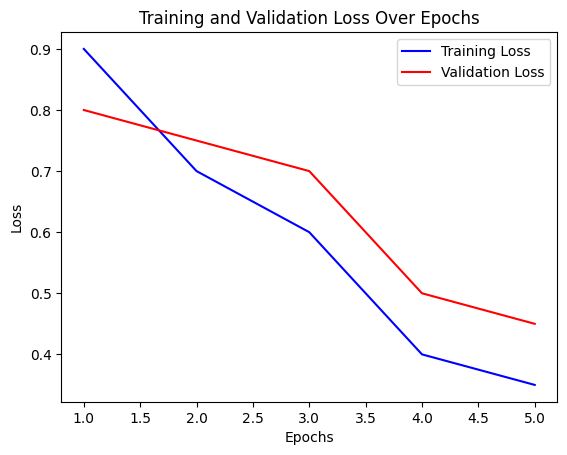

In [22]:
import matplotlib.pyplot as plt

# Assuming you have your training and validation losses stored in lists or arrays
# Example:
train_loss = [0.9, 0.7, 0.6, 0.4, 0.35]  # Replace these with your actual values
val_loss = [0.8, 0.75, 0.7, 0.5, 0.45]  # Replace these with your actual values
epochs = range(1, len(train_loss) + 1)  # Number of epochs

# Plotting the losses
plt.plot(epochs, train_loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')

# Adding labels and title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()

# Display the plot
plt.show()
